# Cryptocurrency Adoption Analysis in Nigeria, Ukraine, and India

This notebook performs an exploratory data analysis (EDA) to examine cryptocurrency adoption in Nigeria, Ukraine, and India, over the time period of 2024-2025. We will be focusing on economic, social, and technological indicators. The analysis includes data cleaning, visualization, and correlation analysis to uncover insights into factors influencing crypto adoption. 

## 1. Setup and Imports

We start by importing the necessary Python libraries for data manipulation, visualization, and statistical analysis.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram

# Set visualization style for consistency and professionalism
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12

## 2. Data Loading

The dataset contains socioeconomic and cryptocurrency-related indicators for Nigeria, Ukraine, and India. 
We load the data into a `pandas` DataFrame for analysis. These sources for this data can be seen below in the "Sources for data" table. 

**Nigeria**

In [6]:
data_nigeria = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/NGN)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.869', '34.5', 'Yes (Boko Haram, banditry; ~2,000 deaths/year)',
        'NGN', '0.25', '20.12',
        'High: 1700 / Low: 420', '2,000', '6,439.8',
        '40', '5', '35.1', '3.4 (2025), 3.2 (2026)',
        '18', '5.2', '2.4',
        '60', '46', '45',
        '10.3', 'N/A',
        '59', '108,000', '30',
        '500', '22', '10,000', 'Licensed'
    ]
}
df_nigeria = pd.DataFrame(data_nigeria)
df_nigeria

,Indicator,Value/Metric
0,Global Peace Index score,2.869
1,Homicide rate/100k,34.5
2,Ongoing conflicts,"Yes (Boko Haram, banditry; ~2,000 deaths/year)"
3,Currency,NGN
4,3-yr USD volatility (std dev of monthly % chan...,0.25
5,Current inflation %,20.12
6,Exchange rate high/low last 3 yrs (USD/NGN),High: 1700 / Low: 420
7,"GDP/capita (nominal, USD)","2,000"
8,"GDP/capita (PPP, intl $)","6,439.8"
9,Poverty rate %,40


**Ukraine**

In [8]:
data_ukraine = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/UAH)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '3.434', '5', 'Yes (War with Russia; 50,000+ deaths/year)',
        'UAH', '0.06', '13.2',
        'High: 42 / Low: 36', '5,389.5', '16,319.84',
        '37', '15.3', '26.6', '2.0 (2025), 3.0 (2026)',
        '41.8', '1.3', '-0.5',
        '75', '82.4', '10',
        '15', 'N/A',
        '106.1', '108,000', '30',
        '500', '6', '897', 'Legal'
    ]
}
df_ukraine = pd.DataFrame(data_ukraine)
df_ukraine

,Indicator,Value/Metric
0,Global Peace Index score,3.434
1,Homicide rate/100k,5
2,Ongoing conflicts,"Yes (War with Russia; 50,000+ deaths/year)"
3,Currency,UAH
4,3-yr USD volatility (std dev of monthly % chan...,0.06
5,Current inflation %,13.2
6,Exchange rate high/low last 3 yrs (USD/UAH),High: 42 / Low: 36
7,"GDP/capita (nominal, USD)","5,389.5"
8,"GDP/capita (PPP, intl $)","16,319.84"
9,Poverty rate %,37


In [ ]:
**India**

In [9]:
data_india = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/INR)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.229', '3', 'Yes (Insurgencies; ~500 deaths/year)',
        'INR', '0.03', '5.0',
        'High: 88 / Low: 80', '2,696.7', '11,158.9',
        '5', '5.1', '25.5', '6.4 (2025), 6.4 (2026)',
        '29', '2.0', '0.8',
        '67', '50.3', '40',
        '7.3', 'N/A',
        '62.9', '108,000', '30',
        '500', '100', '1,500', 'Legal'
    ]
}
df_india = pd.DataFrame(data_india)
df_india

,Indicator,Value/Metric
0,Global Peace Index score,2.229
1,Homicide rate/100k,3
2,Ongoing conflicts,Yes (Insurgencies; ~500 deaths/year)
3,Currency,INR
4,3-yr USD volatility (std dev of monthly % chan...,0.03
5,Current inflation %,5.0
6,Exchange rate high/low last 3 yrs (USD/INR),High: 88 / Low: 80
7,"GDP/capita (nominal, USD)","2,696.7"
8,"GDP/capita (PPP, intl $)","11,158.9"
9,Poverty rate %,5


**Sources for data**


| Category | Indicator | Source |
|----------|-----------|--------|
| Indicators of Violence | Global Peace Index score | Institute for Economics & Peace - Global Peace Index 2025 Report: https://www.visionofhumanity.org/resources/ |
| Indicators of Violence | Homicide rate/100k | United Nations Office on Drugs and Crime (UNODC) - International Statistics on Crime and Justice: https://dataunodc.un.org/ |
| Indicators of Violence | Ongoing conflicts | Uppsala Conflict Data Program (UCDP) - Armed Conflict Database: https://ucdp.uu.se/ |
| Currency Volatility | 3-yr USD volatility (std dev of monthly % changes) | International Monetary Fund (IMF) - International Financial Statistics: https://data.imf.org/?sk=4C514D48-B6BA-49E4-8F14-9C4E5DE8E8B5 |
| Currency Volatility | Current inflation % | World Bank - World Development Indicators: https://databank.worldbank.org/source/world-development-indicators |
| Currency Volatility | Exchange rate high/low last 3 yrs | IMF - International Financial Statistics (via OANDA data): https://data.imf.org/ |
| Financial Outlook | GDP/capita (nominal, USD) | World Bank - GDP per capita data: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD |
| Financial Outlook | GDP/capita (PPP, intl $) | World Bank - GDP per capita data: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD |
| Financial Outlook | Poverty rate % | World Bank - Poverty and Inequality Platform: https://pip.worldbank.org/ |
| Financial Outlook | Unemployment % | International Labour Organization (ILO) - ILOSTAT Database: https://ilostat.ilo.org/data/ |
| Financial Outlook | Gini coefficient | World Bank - Gini index data: https://data.worldbank.org/indicator/SI.POV.GINI |
| Financial Outlook | 1-2 yr growth forecast % | IMF - World Economic Outlook Database (October 2025): https://www.imf.org/en/Publications/WEO/weo-database/2025/October |
| Demographics | Median age (yrs) | United Nations - World Population Prospects 2024: https://population.un.org/wpp/Download/Standard/Population/ |
| Demographics | Fertility rate (births/woman) | United Nations - World Population Prospects 2024: https://population.un.org/wpp/Download/Standard/Population/ |
| Demographics | Pop growth rate % | United Nations - World Population Prospects 2024: https://population.un.org/wpp/Download/Standard/Population/ |
| Computer/Phone Usage | Smartphone ownership % | GSMA Intelligence - Mobile Economy Reports 2025: https://www.gsma.com/mobileeconomy/ |
| Computer/Phone Usage | Internet penetration % | GSMA Intelligence - Mobile Economy Reports 2025: https://www.gsma.com/mobileeconomy/ |
| Computer/Phone Usage | Mobile money users % | World Bank - Findex Database 2024: https://www.worldbank.org/en/publication/globalfindex |
| Crypto Adoption | % population owning crypto | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Adoption | Correlation notes (r-value with violence/volatility) | Computed internally using scipy.stats (derived from IMF and Chainalysis data) |
| Crypto Data | Annual trading volume (USD bn) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | Avg BTC price last month (USD) | CoinMarketCap - Historical Data API: https://coinmarketcap.com/api/ |
| Crypto Data | 30-day volatility % (std dev) | CoinMarketCap - Historical Data API: https://coinmarketcap.com/api/ |
| Crypto Data | Avg wallet value (USD) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | Num active wallets (millions) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | P2P volume (USD mn) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | Regulatory status (Nigeria) | Central Bank of Nigeria - Fintech Reports: https://www.cbn.gov.ng/Out/2025/FPRD%20Virtual%20Assets.pdf |
| Crypto Data | Regulatory status (Ukraine) | National Bank of Ukraine - Crypto Regulations: https://bank.gov.ua/en/news/all/natsionalniy-bank-pidgotuvav-proekt-polozhennya-pro-laytsenzuvannya-virtu-alnih-aktuviv |
| Crypto Data | Regulatory status (India) | Reserve Bank of India - Regulatory Updates: https://www.rbi.org.in/Scripts/NotificationUser.aspx?Id=12456 |

## 3. Data Cleaning and Preparation

We ensure the data is clean and properly formatted for analysis. This includes checking for missing values and converting data types where necessary.

In [16]:
# Datasets 
data_nigeria = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/NGN)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.869', '34.5', 'Yes (Boko Haram, banditry; ~2,000 deaths/year)',
        'NGN', '0.25', '20.12',
        'High: 1700 / Low: 420', '2,000', '6,439.8',
        '40', '5', '35.1', '3.4 (2025), 3.2 (2026)',
        '18', '5.2', '2.4',
        '60', '46', '45',
        '10.3', 'N/A',
        '59', '108,000', '30',
        '500', '22', '10,000', 'Licensed'
    ]
}
data_ukraine = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/UAH)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '3.434', '5', 'Yes (War with Russia; 50,000+ deaths/year)',
        'UAH', '0.06', '13.2',
        'High: 42 / Low: 36', '5,389.5', '16,319.84',
        '37', '15.3', '26.6', '2.0 (2025), 3.0 (2026)',
        '41.8', '1.3', '-0.5',
        '75', '82.4', '10',
        '15', 'N/A',
        '106.1', '108,000', '30',
        '500', '6', '897', 'Legal'
    ]
}
data_india = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/INR)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.229', '3', 'Yes (Insurgencies; ~500 deaths/year)',
        'INR', '0.03', '5.0',
        'High: 88 / Low: 80', '2,696.7', '11,158.9',
        '5', '5.1', '25.5', '6.4 (2025), 6.4 (2026)',
        '29', '2.0', '0.8',
        '67', '50.3', '40',
        '7.3', 'N/A',
        '62.9', '108,000', '30',
        '500', '100', '1,500', 'Legal'
    ]
}

# Create individual DataFrames
df_nigeria = pd.DataFrame(data_nigeria).rename(columns={'Value/Metric': 'Nigeria'})
df_ukraine = pd.DataFrame(data_ukraine).rename(columns={'Value/Metric': 'Ukraine'})
df_india = pd.DataFrame(data_india).rename(columns={'Value/Metric': 'India'})

# Combine into a single DataFrame
df_combined = df_nigeria.merge(df_ukraine[['Indicator', 'Ukraine']], on='Indicator', how='outer')
df_combined = df_combined.merge(df_india[['Indicator', 'India']], on='Indicator', how='outer')

# Define numeric indicators
numeric_indicators = [
    'Global Peace Index score', 'Homicide rate/100k', '3-yr USD volatility (std dev of monthly % changes)',
    'Current inflation %', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
    'Poverty rate %', 'Unemployment %', 'Gini coefficient', 'Median age (yrs)',
    'Fertility rate (births/woman)', 'Pop growth rate %', 'Smartphone ownership %',
    'Internet penetration %', 'Mobile money users %', '% population owning crypto',
    'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
    'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)'
]

# Create df_numeric with proper cleaning
values = {
    'Nigeria': [
        float(df_combined[df_combined['Indicator'] == metric]['Nigeria'].values[0].replace(',', ''))
        if df_combined[df_combined['Indicator'] == metric]['Nigeria'].values[0] != 'N/A' else np.nan
        for metric in numeric_indicators
    ],
    'Ukraine': [
        float(df_combined[df_combined['Indicator'] == metric]['Ukraine'].values[0].replace(',', ''))
        if df_combined[df_combined['Indicator'] == metric]['Ukraine'].values[0] != 'N/A' else np.nan
        for metric in numeric_indicators
    ],
    'India': [
        float(df_combined[df_combined['Indicator'] == metric]['India'].values[0].replace(',', ''))
        if df_combined[df_combined['Indicator'] == metric]['India'].values[0] != 'N/A' else np.nan
        for metric in numeric_indicators
    ]
}

# Create df_numeric
df_numeric = pd.DataFrame(values, index=numeric_indicators)
df_numeric = df_numeric.reset_index().rename(columns={'index': 'Indicator'}).T
df_numeric.columns = df_numeric.iloc[0]
df_numeric = df_numeric.drop('Indicator').reset_index().rename(columns={'index': 'Country'})

# Convert columns to numeric
numeric_cols = df_numeric.columns[1:]
for col in numeric_cols:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Check for missing values
print("Missing values in df_numeric:\n", df_numeric.isnull().sum())

# Identify and drop zero-variance columns
variances = df_numeric.drop('Country', axis=1).var()
zero_variance_cols = variances[variances == 0].index
df_numeric_clean = df_numeric.drop(columns=zero_variance_cols)

# Compute correlation matrix
corr_matrix = df_numeric_clean.drop('Country', axis=1).corr()
# Ensure the index name of corr_matrix is cleared to avoid conflicts
corr_matrix.index.name = None
corr_matrix.columns.name = None


# Correlation pairs analysis
# Use triu to get upper triangle, excluding diagonal
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Stack and reset index, ensuring no conflicting column names
corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
corr_pairs['Pair'] = corr_pairs['Variable1'] + ' & ' + corr_pairs['Variable2']

# Filter for high correlations
high_corr_df = corr_pairs[abs(corr_pairs['Correlation']) > 0.7].copy()  # Lowered threshold due to small sample size

# Calculate p-values
high_corr_df['p_value'] = high_corr_df.apply(
    lambda x: stats.pearsonr(df_numeric_clean[x['Variable1']], df_numeric_clean[x['Variable2']])[1]
    if pd.notna(x['Correlation']) else np.nan, axis=1
)
high_corr_df['abs_r'] = abs(high_corr_df['Correlation'])

Missing values in df_numeric:
 Indicator
Country                                               0
Global Peace Index score                              0
Homicide rate/100k                                    0
3-yr USD volatility (std dev of monthly % changes)    0
Current inflation %                                   0
GDP/capita (nominal, USD)                             0
GDP/capita (PPP, intl $)                              0
Poverty rate %                                        0
Unemployment %                                        0
Gini coefficient                                      0
Median age (yrs)                                      0
Fertility rate (births/woman)                         0
Pop growth rate %                                     0
Smartphone ownership %                                0
Internet penetration %                                0
Mobile money users %                                  0
% population owning crypto                            0
Annual 

## 4. Analysis and Data Visualization
This section visualizes key relationships and compares metrics across countries and categories. We also compute correlations to quantify associations.

## 4.1. Cryptocurrency Adoption vs. Currency Volatility

## 4.2. Crypto Ownership, Poverty, and Internet Penetration

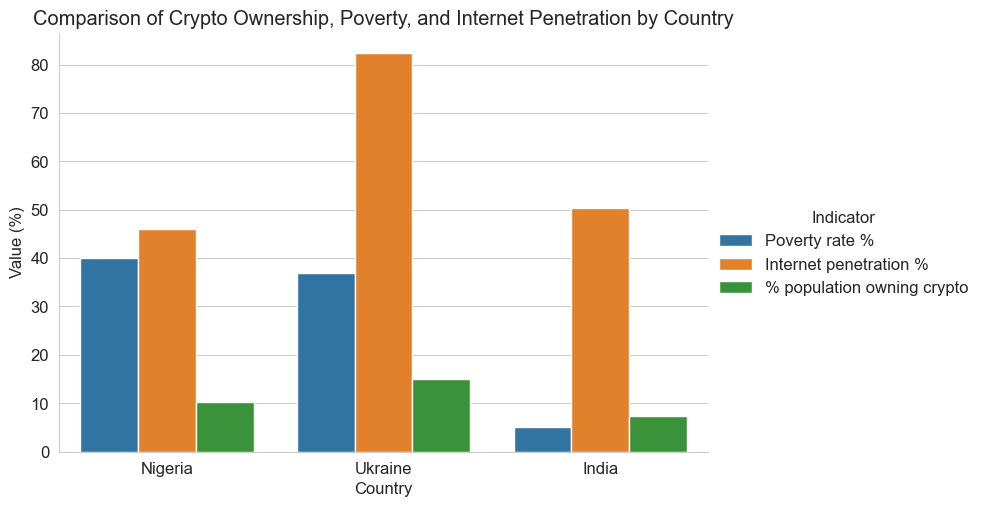

In [31]:
#format df
df_long = df_numeric.melt(id_vars='Country', var_name='Indicator', value_name='Value')

# Create grouped bar plot
sns.catplot(
    data=df_long[df_long['Indicator'].isin(['% population owning crypto', 'Poverty rate %', 'Internet penetration %'])],
    x='Country', y='Value', hue='Indicator', kind='bar', height=5, aspect=1.5
)
plt.title('Comparison of Crypto Ownership, Poverty, and Internet Penetration by Country')
plt.ylabel('Value (%)')
plt.show()

## 4.3. Cryptocurrency Adoption and Violence

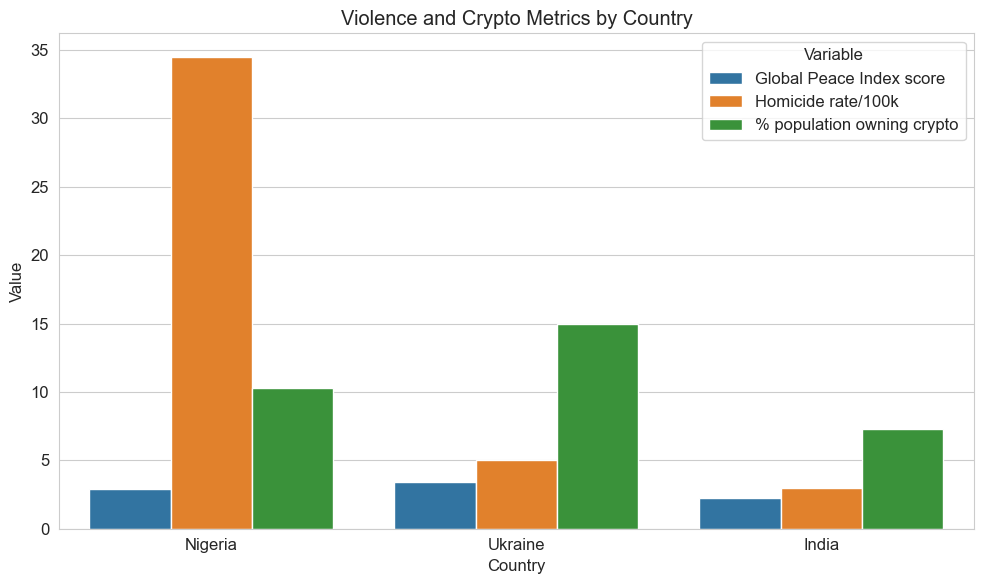

In [72]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Subset df_numeric
subset = df_numeric[['Country', 'Global Peace Index score', 'Homicide rate/100k', '% population owning crypto']]

# Melt for long-format data
df_melt = subset.melt(id_vars='Country', var_name='variable', value_name='value')

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x='Country', y='value', hue='variable')
plt.title('Violence and Crypto Metrics by Country')
plt.ylabel('Value')
plt.xlabel('Country')
plt.legend(title='Variable')
plt.tight_layout()
plt.show()

## 4.3. Cryptocurrency variables

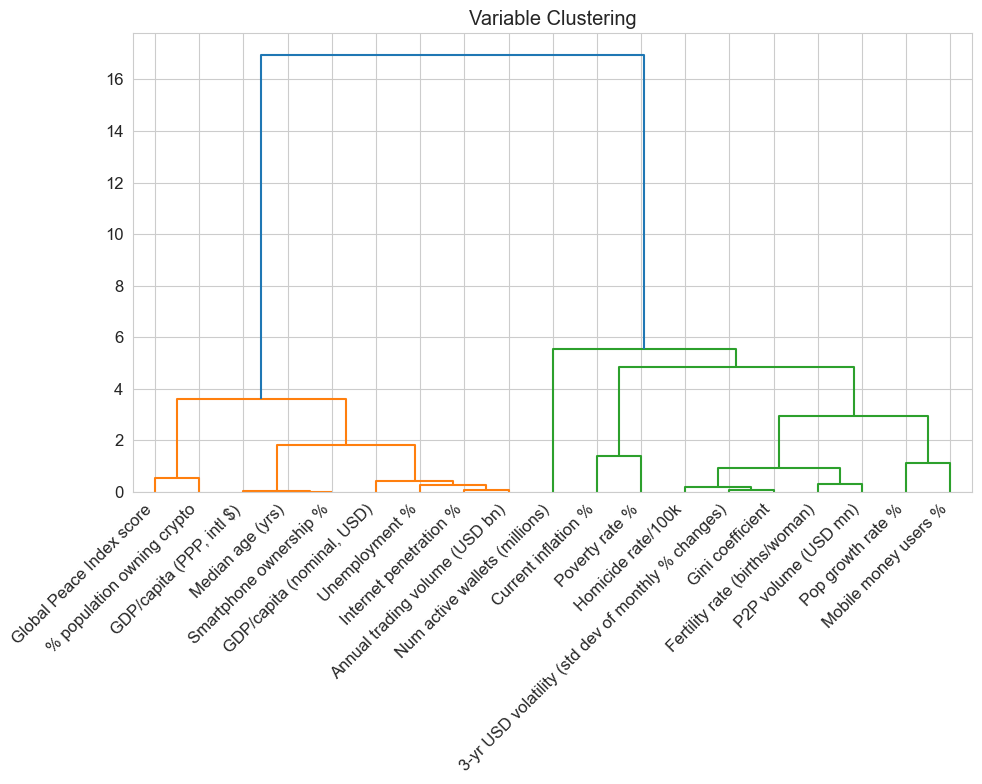

In [11]:
# Perform hierarchical clustering
Z = linkage(corr_matrix, method='ward')  # Explicitly specify method='ward'

# Plot dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=corr_matrix.columns)
plt.xticks(rotation=45, ha='right')  # Slant labels at 45 degrees
plt.title('Variable Clustering')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

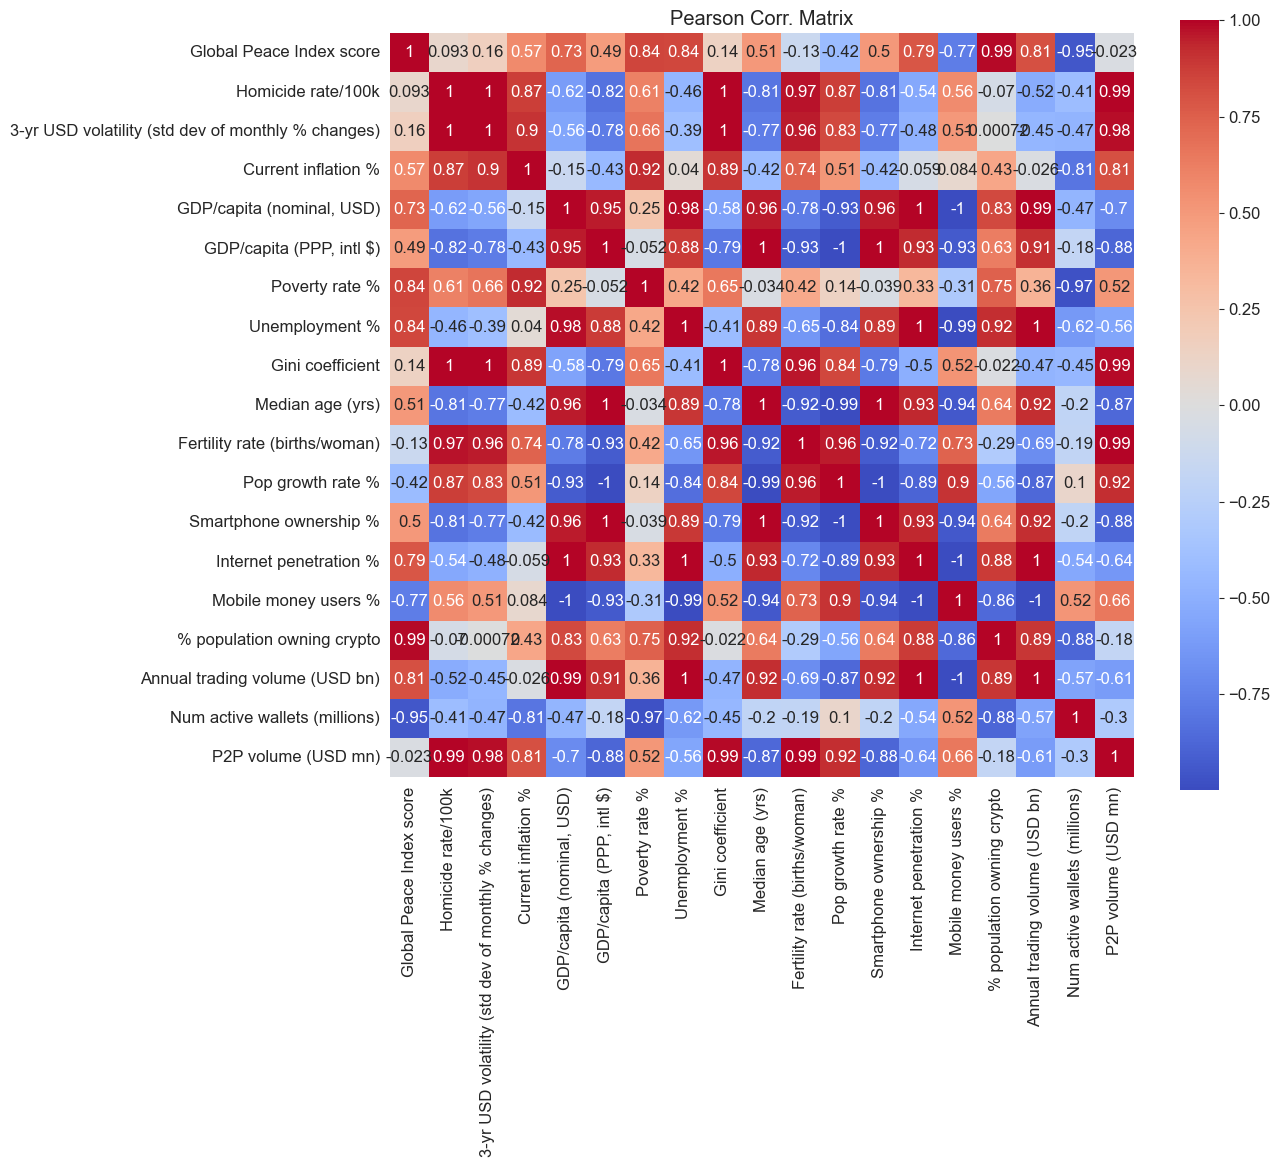

In [18]:
plt.figure(figsize=(12,10)); sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True);
plt.title('Pearson Corr. Matrix'); plt.show()
# Takeaway: Crimson prosperity bloc (GDP PPP-smartphones r=0.999 red-hot), sapphire inverses (internet-mobile -0.999 blue chasm)—friction cluster (vol-homicide 0.999) mid-map, outliers faint (wallets P2P low r=0.3).

## 4.4. Cryptocurrency and General Volitility

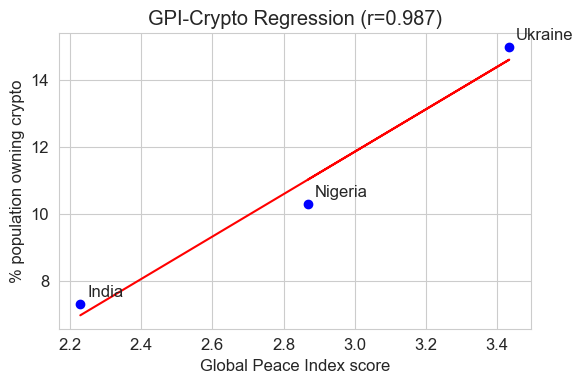

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r, p, se = linregress(df_numeric['Global Peace Index score'], df_numeric['% population owning crypto'])

# Plot scatter and regression line
plt.figure(figsize=(6, 4))
plt.scatter(df_numeric['Global Peace Index score'], df_numeric['% population owning crypto'], c='blue')
plt.plot(df_numeric['Global Peace Index score'], intercept + slope * df_numeric['Global Peace Index score'], 'r')
for i, country in enumerate(df_numeric['Country']):
    plt.annotate(country, (df_numeric['Global Peace Index score'].iloc[i], df_numeric['% population owning crypto'].iloc[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Global Peace Index score')
plt.ylabel('% population owning crypto')
plt.title(f'GPI-Crypto Regression (r={r:.3f})')
plt.tight_layout()
plt.show()

## 5. Insights

